
# Satire Detection: Exploratory Data Analysis (EDA)

This notebook provides a comprehensive Exploratory Data Analysis (EDA) on a dataset of satirical and non-satirical articles.


# New Section

In [9]:
# import true dataset
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 13.4 MB/s eta 0:00:00


In [10]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive')

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [11]:
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from wordcloud import WordCloud

In [12]:
# Load the dataset. Make sure to upload satire folder and rename to satire.zip

# Path to the dataset
# zip_path_new = 'satire.zip'

# Barrett saved  zip to own gdrive to keep file local
zip_path_new = '/content/drive/MyDrive/satire.zip'
unzip_dir_new = 'satire_unzipped.zip'

with zipfile.ZipFile(zip_path_new, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir_new)

# Define paths
satire_dir_new = os.path.join(unzip_dir_new, "satire")
training_path_new = os.path.join(satire_dir_new, "training")
training_class_path_new = os.path.join(satire_dir_new, "training-class")

# Load training labels
with open(training_class_path_new, 'r', encoding='utf-8', errors='ignore') as file:
    training_labels_new = [line.strip().split() for line in file.readlines()]

# Mapping of filenames to labels
label_map_new = {filename: label for filename, label in training_labels_new}

# Load training examples
training_data_new = []
for filename, label in training_labels_new:
    file_path = os.path.join(training_path_new, filename)
    with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
        content = file.read()
        training_data_new.append({
            "filename": filename,
            "content": content,
            "label": label
        })

# Convert to DataFrame for easier analysis
training_df_new = pd.DataFrame(training_data_new)

# Load "The Onion" articles
theonion_dir = os.path.join(satire_dir_new, "theonion_articles")
theonion_data = []
for filename in os.listdir(theonion_dir):
    file_path = os.path.join(theonion_dir, filename)
    with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
        content = file.read()
        theonion_data.append({
            "filename": filename,
            "content": content,
            "label": "satire"
        })

# Convert to DataFrame and append to the main training DataFrame
theonion_df = pd.DataFrame(theonion_data)
training_df_extended = pd.concat([training_df_new, theonion_df], ignore_index=True)
training_df_extended['word_count'] = training_df_extended['content'].apply(lambda x: len(x.split()))

In [13]:
training_df_extended

,filename,content,label,word_count
0,training-0001,"G7 meeting seen as ""dollar's last hope"" \n\...",true,421
1,training-0002,NZ Government Signs Land Deal with Maoris \...,true,137
2,training-0003,Saudi man suffocates in bid for freedom \n\...,true,135
3,training-0004,News Analysis: Thai PM-Apparent Faces Tough...,true,666
4,training-0005,China Expands Foreign Cooperation in Onshor...,true,337
...,...,...,...,...
2677,0039.txt,Hayao Miyazaki Announces Return To Filmmaking ...,satire,235
2678,0026.txt,Aide Pulls Several Wet Pages Of Bill Out Of Di...,satire,142
2679,0055.txt,"Your dream home!\n\nSometimes, dreams do come ...",satire,40
2680,0031.txt,Triumphant Biden Announces U.S. Has Killed Man...,satire,186


In [14]:
df_hare=pd.read_csv('/content/drive/MyDrive/allSatire.csv',
                  usecols = ['Body','Title','wordCount'])

In [15]:
df_hare.head()

,Body,Title,wordCount
0,"WHITE PLAINS, KY—Reports coming out of United ...",Motion-Activated Lights Turn Off During Presby...,224
1,"Jamestown, RI—In a series of devastating tweet...",Biological Survival Machine Claims Twitter Vic...,314
2,"WEST LINN, OR—Local unemployed 28-year-old man...","‘Religion Is A Parasite,’ Says Guy Living In M...",215
3,"NASHVILLE, TN—After months of speculation and ...",LifeWay Introduces New Protective Christian Bu...,180
4,"NEWPORT, VT—Arrive at First Baptist Church of ...",Local Man With No Detectable Spiritual Gifts A...,279


In [16]:
def transform_df_hare(df):
    # Create filename column using f-strings
    df['filename'] = [f'hare_{i+1:05}' for i in range(df.shape[0])]

    # Remove everything before the first dash in the Body column
    df['Body'] = df['Body'].apply(lambda x: x.split('—', 1)[-1].strip())

    # Create a content column combining Title and Body using f-strings
    df['content'] = df.apply(lambda row: f"{row['Title']}\n{row['Body']}", axis=1)

    # Rename wordCount column to word_count
    df.rename(columns={"wordCount": "word_count"}, inplace=True)

    # Add label column with "satire" as default value
    df['label'] = 'satire'

    # Rearrange and select desired columns
    df = df[['filename', 'content', 'label', 'word_count']]

    return df

In [17]:
transformed_df_hare = transform_df_hare(df_hare)

In [18]:
transformed_df_hare.head()

,filename,content,label,word_count
0,hare_00001,Motion-Activated Lights Turn Off During Presby...,satire,224
1,hare_00002,Biological Survival Machine Claims Twitter Vic...,satire,314
2,hare_00003,"‘Religion Is A Parasite,’ Says Guy Living In M...",satire,215
3,hare_00004,LifeWay Introduces New Protective Christian Bu...,satire,180
4,hare_00005,Local Man With No Detectable Spiritual Gifts A...,satire,279


In [19]:
training_df_extended = pd.concat([training_df_extended, transformed_df_hare], ignore_index=True)

In [20]:
from datasets import load_dataset
true_dataset = load_dataset("cc_news", split='train')
true_df = true_dataset.to_pandas()

Generating train split:   0%|          | 0/708241 [00:00<?, ? examples/s]

In [21]:
true_df.head()

,title,text,domain,date,description,url,image_url
0,Daughter Duo is Dancing in The Same Company,There's a surprising twist to Regina Willoughb...,www.pointemagazine.com,2017-12-11 20:19:05,There's a surprising twist to Regina Willoughb...,http://www.pointemagazine.com/mother-daughter-...,https://pointe-img.rbl.ms/simage/https%3A%2F%2...
1,New York City Ballet Announces Interim Leaders...,The New York City Ballet Board of Directors an...,www.pointemagazine.com,2017-12-11 17:02:55,NYCB has announced an interim leadership team ...,http://www.pointemagazine.com/nycb-interim-lea...,https://pointe-img.rbl.ms/simage/https%3A%2F%2...
2,Watch Pennsylvania Ballet & Boston Ballet Face...,The Philadelphia Eagles and the New England Pa...,www.pointemagazine.com,2018-02-02 21:58:13,The Philadelphia Eagles and the New England Pa...,http://www.pointemagazine.com/watch-pennsylvan...,https://pointe-img.rbl.ms/simage/https%3A%2F%2...
3,dance shoes,Looking for your next audition shoe? Shot at a...,www.pointemagazine.com,2018-04-24 19:00:11,Looking for your next audition shoe? Shot at a...,https://www.pointemagazine.com/dance-shoes-256...,https://pointe-img.rbl.ms/simage/https%3A%2F%2...
4,Rebecca Krohn on Her Retirement from New York ...,New York City Ballet principal dancer Rebecca ...,www.pointemagazine.com,2017-10-06 14:44:51,We interviewed New York City Ballet principal ...,http://www.pointemagazine.com/rebecca-krohn-re...,https://pointe-img.rbl.ms/simage/https%3A%2F%2...


In [22]:
def transform_true_df(df):
    # Create filename column using f-strings
    df['filename'] = [f'cc-news_{i+1:05}' for i in range(df.shape[0])]

    # Create a content column combining Title and Body using f-strings
    df['content'] = df.apply(lambda row: f"{row['title']}\n{row['text']}", axis=1)

    def count_words(text):
      words = text.split()
      return len(words)

    # Get a rough count of the words in the text, including title
    df['word_count'] = df['content'].apply(count_words)

    # Add label column with "satire" as default value
    df['label'] = 'true'

    # Rearrange and select desired columns
    df = df[['filename', 'content', 'label', 'word_count']]

    return df

In [23]:
# Selecting the top 20000 most recent records to save space on Colab
n = 20000
true_df_sorted = true_df.sort_values(by='date', ascending=False)
top_20k = true_df_sorted.head(n)

transformed_true_df = transform_true_df(top_20k)
transformed_true_df.head()

<ipython-input-22-8001b11e7783>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['filename'] = [f'cc-news_{i+1:05}' for i in range(df.shape[0])]
<ipython-input-22-8001b11e7783>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'] = df.apply(lambda row: f"{row['title']}\n{row['text']}", axis=1)
<ipython-input-22-8001b11e7783>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

,filename,content,label,word_count
464793,cc-news_00001,An Oasis of Sailing at Pwllheli: A Britpop Int...,true,522
464797,cc-news_00002,30th Antigua Classic Yacht Regatta\n30th Antig...,true,529
213923,cc-news_00003,"Opinion: Osun 2018 and how APC, PDP should sou...",true,789
362481,cc-news_00004,"Jamaican, Caribbean News News at Caribdaily.co...",true,400
614552,cc-news_00005,Scientists create microscopic 'swimmers' contr...,true,872


In [24]:
training_df_extended = pd.concat([training_df_extended, transformed_true_df], ignore_index=True)

In [25]:
label_counts = training_df_extended['label'].value_counts()
print(label_counts)

true      22505
satire    13309
Name: label, dtype: int64


In [26]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [27]:
X = training_df_extended['content']
y = training_df_extended['label']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

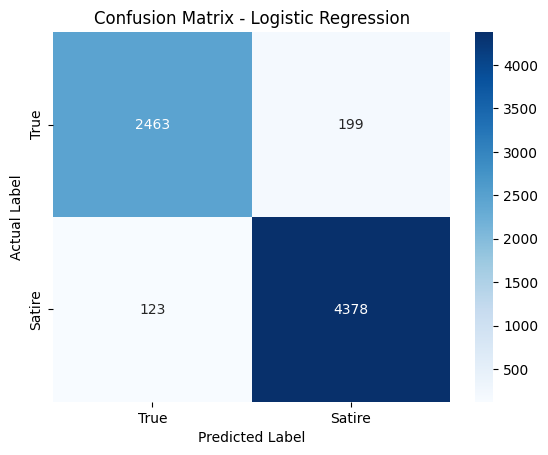

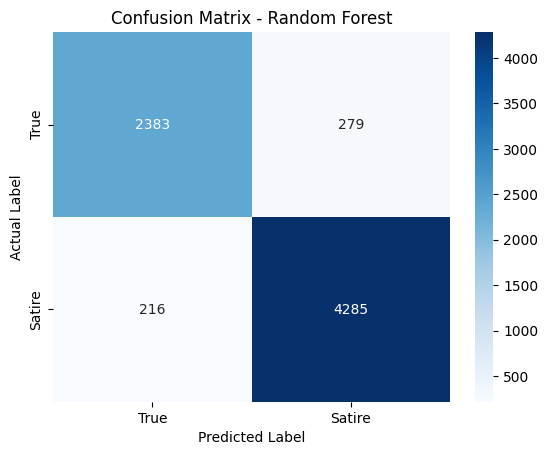

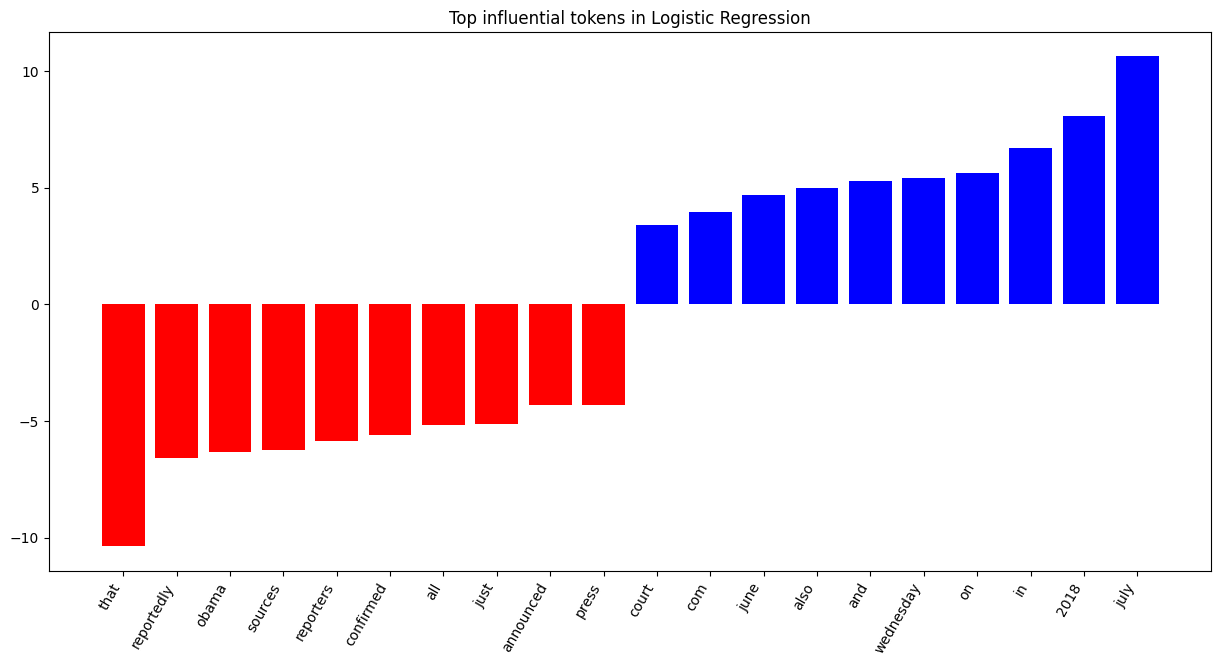

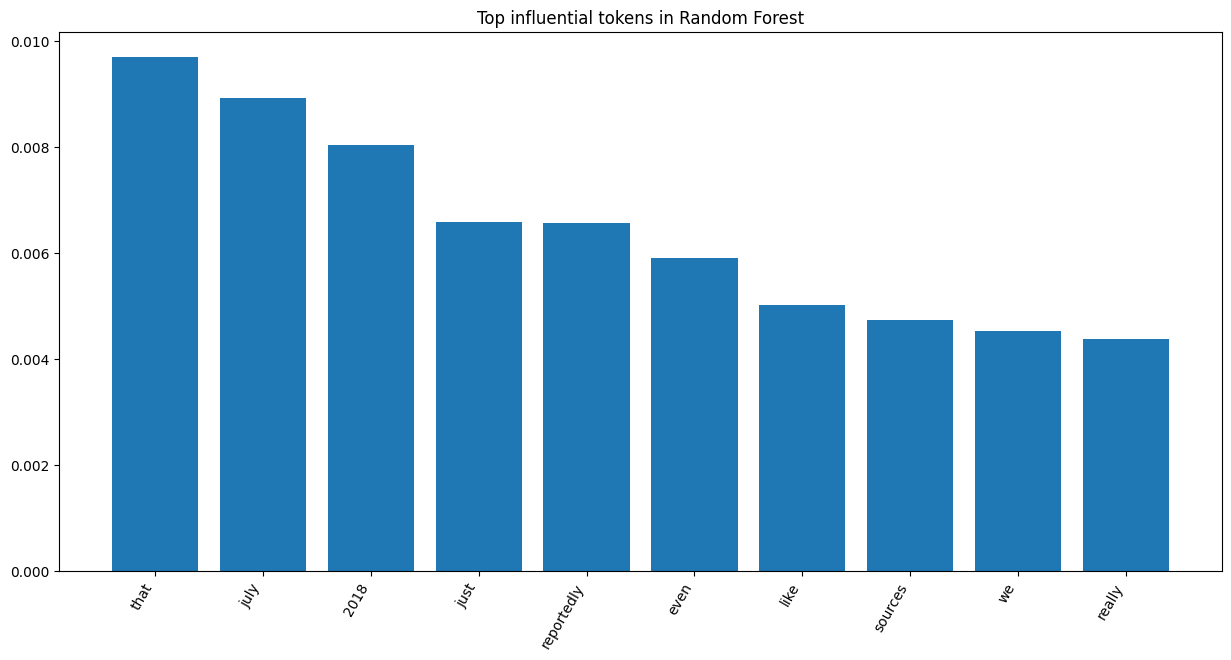

In [20]:

# Build pipelines for both models
logistic_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(solver='liblinear'))
])

rf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier())
])

# Train both models
logistic_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)

# Predict on validation data
logistic_preds = logistic_pipeline.predict(X_val)
rf_preds = rf_pipeline.predict(X_val)

# Visualization of Results
def plot_confusion_matrix(y_true, y_pred, title):
    matrix = confusion_matrix(y_true, y_pred)
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['True', 'Satire'], yticklabels=['True', 'Satire'])
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.title(title)
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(y_val, logistic_preds, "Confusion Matrix - Logistic Regression")
plot_confusion_matrix(y_val, rf_preds, "Confusion Matrix - Random Forest")

# Extract vectorizer and trained models from the pipelines
tfidf_vectorizer = logistic_pipeline.named_steps['tfidf']

# Display top influential tokens for both models
def plot_top_features(model, vectorizer, top_n=10):
    feature_names = vectorizer.get_feature_names_out()
    if hasattr(model, "coef_"):
        sorted_coef_index = model.coef_[0].argsort()
        top_positive_coefficients = sorted_coef_index[-top_n:]
        top_negative_coefficients = sorted_coef_index[:top_n]
        top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
        plt.figure(figsize=(15, 7))
        colors = ['red' if coef < 0 else 'blue' for coef in model.coef_[0][top_coefficients]]
        plt.bar(np.arange(2 * top_n), model.coef_[0][top_coefficients], color=colors)
        plt.xticks(np.arange(2 * top_n), np.array(feature_names)[top_coefficients], rotation=60, ha='right')
        plt.title("Top influential tokens in Logistic Regression")
        plt.show()
    elif hasattr(model, "feature_importances_"):
        sorted_importances_index = model.feature_importances_.argsort()[-top_n:][::-1]
        plt.figure(figsize=(15, 7))
        plt.bar(np.arange(top_n), model.feature_importances_[sorted_importances_index])
        plt.xticks(np.arange(top_n), np.array(feature_names)[sorted_importances_index], rotation=60, ha='right')
        plt.title("Top influential tokens in Random Forest")
        plt.show()

plot_top_features(logistic_pipeline.named_steps['clf'], tfidf_vectorizer)
plot_top_features(rf_pipeline.named_steps['clf'], tfidf_vectorizer)

In [21]:
from sklearn.metrics import classification_report

# Classification report for Logistic Regression
logistic_report = classification_report(y_val, logistic_preds, target_names=['True', 'Satire'])
print("Classification Report - Logistic Regression:")
print(logistic_report)

# Classification report for Random Forest
rf_report = classification_report(y_val, rf_preds, target_names=['True', 'Satire'])
print("\nClassification Report - Random Forest:")
print(rf_report)


Classification Report - Logistic Regression:
              precision    recall  f1-score   support

        True       0.95      0.93      0.94      2662
      Satire       0.96      0.97      0.96      4501

    accuracy                           0.96      7163
   macro avg       0.95      0.95      0.95      7163
weighted avg       0.96      0.96      0.95      7163


Classification Report - Random Forest:
              precision    recall  f1-score   support

        True       0.92      0.90      0.91      2662
      Satire       0.94      0.95      0.95      4501

    accuracy                           0.93      7163
   macro avg       0.93      0.92      0.93      7163
weighted avg       0.93      0.93      0.93      7163



Logistic Regression:

The overall accuracy is 96%, which is excellent.
Precision, recall, and F1-score are all above 93% for both classes.
The model seems to perform slightly better on the "Satire" class compared to the "True" class, which is likely due to the dataset having more "Satire" examples.
Random Forest:

The overall accuracy is 93%.
Precision, recall, and F1-score are all above 90% for both classes.
Similar to the Logistic Regression model, Random Forest also performs slightly better on the "Satire" class.

The fact that Logistic Regression performed slightly better than Random Forest in this context is interesting. Here are several potential reasons behind it:

**Linearity in the Data:** Logistic Regression is a linear model, which means it assumes a linear decision boundary between classes. If the transformed features (e.g., using TF-IDF) exhibit a linear or near-linear separability between the classes, Logistic Regression will naturally perform well.

**High Dimensionality:** The TF-IDF transformation of text data often results in a high-dimensional feature space. Logistic Regression can handle high-dimensional data quite effectively, especially when regularized.

**Regularization:** Logistic Regression inherently includes regularization (L1 or L2 based on configuration), which can help prevent overfitting, especially in high-dimensional spaces.

**Model Configuration and Hyperparameters:** The hyperparameters chosen for Random Forest might not be the optimal ones for this dataset. Random Forest has many hyperparameters like the number of trees, max depth of trees, min samples to split, etc. If not tuned correctly, it might not perform at its best.

**Training Data Size:** Random Forests usually benefit from having more data. If the dataset size is not large enough, a Random Forest might not perform as well as it could with more data, whereas a Logistic Regression might already be near its optimal performance. So possibly, this dataset is not large enough. We did have to reduce the number of records to save space.

**Noise and Outliers:** Logistic Regression can sometimes be more robust to noise and outliers in some contexts, especially when regularized.

**NEXT STEP: HYPERPARAMETER TUNING AND REGULARIZATION**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid
logistic_params = {
    'tfidf__ngram_range': [(1, 1), (1, 2)],  # Unigrams or Bigrams
    'clf__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'clf__penalty': ['l1', 'l2']
}

# Create the GridSearchCV object
logistic_search = GridSearchCV(logistic_pipeline, param_grid=logistic_params, cv=5, verbose=1, n_jobs=-1)

# Fit to the data
logistic_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", logistic_search.best_params_)
print("Best cross-validation score:", logistic_search.best_score_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [23]:
# Set up the parameter grid
rf_params = {
    'tfidf__ngram_range': [(1, 1), (1, 2)],  # Unigrams or Bigrams
    'clf__n_estimators': [50, 100, 200],
    'clf__max_depth': [None, 10, 20, 30]
}

# Create the GridSearchCV object
rf_search = GridSearchCV(rf_pipeline, param_grid=rf_params, cv=5, verbose=1, n_jobs=-1)

# Fit to the data
rf_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", rf_search.best_params_)
print("Best cross-validation score:", rf_search.best_score_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters: {'clf__max_depth': None, 'clf__n_estimators': 200, 'tfidf__ngram_range': (1, 1)}
Best cross-validation score: 0.9355344483006751


In [28]:
# Predict using the best logistic model
# Set up the pipeline with the best parameters. From a previous runtime, we have the best params below
best_logistic_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2))),
    ('clf', LogisticRegression(C=100, penalty='l2', solver='liblinear'))
])

# Train the model using the training data
best_logistic_pipeline.fit(X_train, y_train)
logistic_best_preds = best_logistic_pipeline.predict(X_val)

# Print classification report
logistic_best_report = classification_report(y_val, logistic_best_preds, target_names=['True', 'Satire'])
print("Classification Report - Logistic Regression (Best Parameters):")
print(logistic_best_report)


Classification Report - Logistic Regression (Best Parameters):
              precision    recall  f1-score   support

        True       0.97      0.96      0.96      2662
      Satire       0.97      0.98      0.98      4501

    accuracy                           0.97      7163
   macro avg       0.97      0.97      0.97      7163
weighted avg       0.97      0.97      0.97      7163



In [25]:
# Predict using the best random forest model
rf_best_preds = rf_search.best_estimator_.predict(X_val)

# Print classification report
rf_best_report = classification_report(y_val, rf_best_preds, target_names=['True', 'Satire'])
print("Classification Report - Random Forest (Best Parameters):")
print(rf_best_report)


Classification Report - Random Forest (Best Parameters):
              precision    recall  f1-score   support

        True       0.92      0.90      0.91      2662
      Satire       0.94      0.95      0.95      4501

    accuracy                           0.93      7163
   macro avg       0.93      0.93      0.93      7163
weighted avg       0.93      0.93      0.93      7163

